# Hola &#x1F600;

Soy **Hesus Garcia**, revisor de código de Triple Ten, y voy a examinar el proyecto que has desarrollado recientemente. Si encuentro algún error, te lo señalaré para que lo corrijas, ya que mi objetivo es ayudarte a prepararte para un ambiente de trabajo real, donde el líder de tu equipo actuaría de la misma manera. Si no puedes solucionar el problema, te proporcionaré más información en la próxima oportunidad. Cuando encuentres un comentario,  **por favor, no los muevas, no los modifiques ni los borres**. 
**Una gran disculpa por el retraso en la revisión de tu proyecto. Hemos tenido una carga de proyectos que nos sobrepasó**
Revisaré cuidadosamente todas las implementaciones que has realizado para cumplir con los requisitos y te proporcionaré mis comentarios de la siguiente manera:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

</br>

**¡Empecemos!**  &#x1F680;


# Proyecto:Análisis Predictivo de Cancelación de Membresías en Gimnasios Model Fitness.

# Introducción.

Este proyecto tiene como objetivo comprender mejor el comportamiento de los clientes de un gimnasio y desarrollar estrategias efectivas de retención. Utilizaremos análisis de datos y técnicas de machine learning para predecir la cancelación de clientes, segmentarlos en grupos con características similares y formular recomendaciones para mejorar la retención.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Considera la posibilidad de incluir una tabla de contenidos al inicio de tu proyecto. Esto no solo mejorará la estructura y presentación de tu análisis, sino que también facilitará la navegación y comprensión de los distintos temas tratados, especialmente para proyectos extensos con múltiples secciones y subsecciones. Una tabla de contenidos bien organizada puede mejorar significativamente la experiencia del lector y destacar la profesionalidad de tu trabajo.
</div>


##  Paso: Descarga de datos.

### Descarga y optimización de datos.
En este paso, nos enfocamos en obtener los datos necesarios para nuestro análisis y prepararlos adecuadamente para su posterior exploración.

#### Inicialización

In [1]:
# Cargar todas las librerias.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Quería proporcionarte algunos comentarios sobre la organización de los imports en tu código. 
Es preferible agrupar los imports siguiendo el siguiente orden:

Imports de la biblioteca estándar de Python.
Imports de bibliotecas de terceros relacionadas.
Imports específicos de la aplicación local o biblioteca personalizada.
Para mejorar la legibilidad del código, también es recomendable dejar una línea en blanco entre cada grupo de imports, pero solo un import por línea.
Te dejo esta referencia con ejemplos:  
https://pep8.org/#imports

</div>

#### Cargar Datos.

In [2]:
file_path = '/datasets/gym_churn_us.csv'
data = pd.read_csv(file_path)

## Análisis Exploratorio de Datos.

In [3]:
# Verificar características ausentes
missing_values = data.isnull().sum()
print("Valores ausentes por característica:\n", missing_values)

Valores ausentes por característica:
 gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64


In [4]:
# Estadísticas descriptivas del dataset
descriptive_stats = data.describe()
print("\nEstadísticas descriptivas del dataset:\n", descriptive_stats)


Estadísticas descriptivas del dataset:
             gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.0

In [5]:
# Valores medios por grupo de cancelación
group_means = data.groupby('Churn').mean()
print("\nValores medios por grupo de cancelación:\n", group_means)


Valores medios por grupo de cancelación:
          gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                              

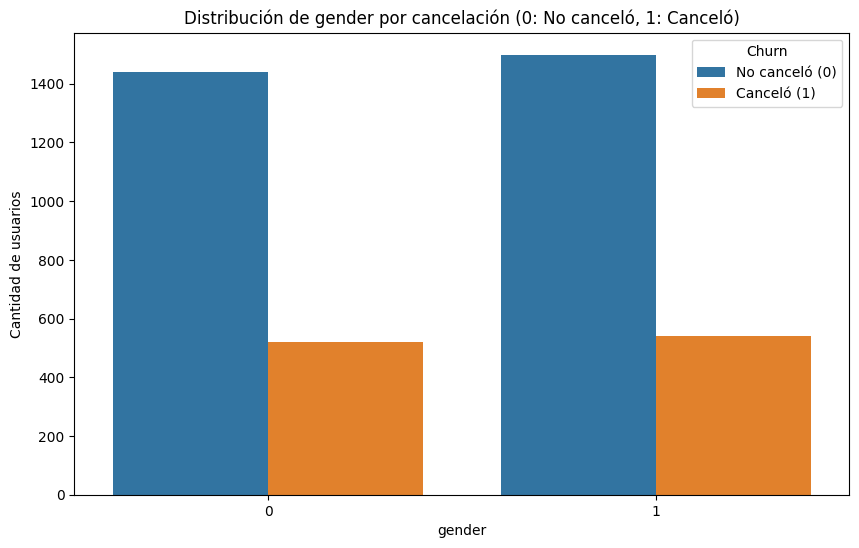

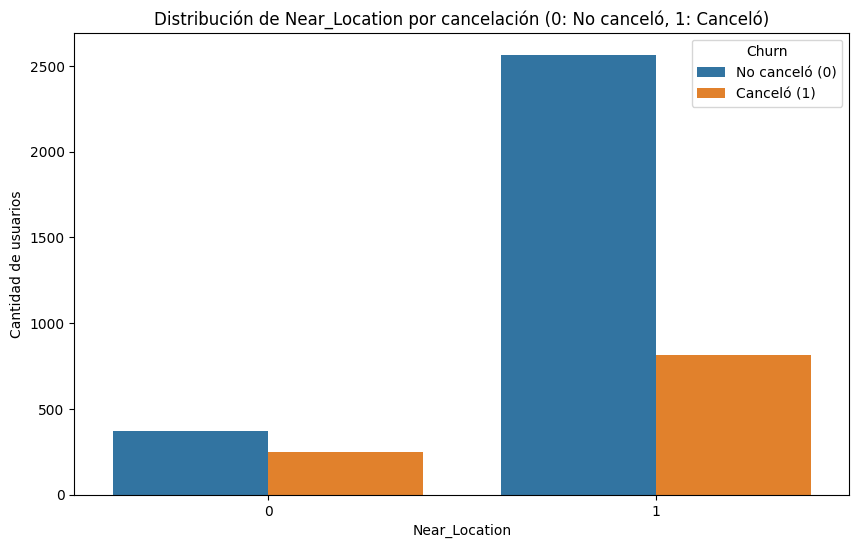

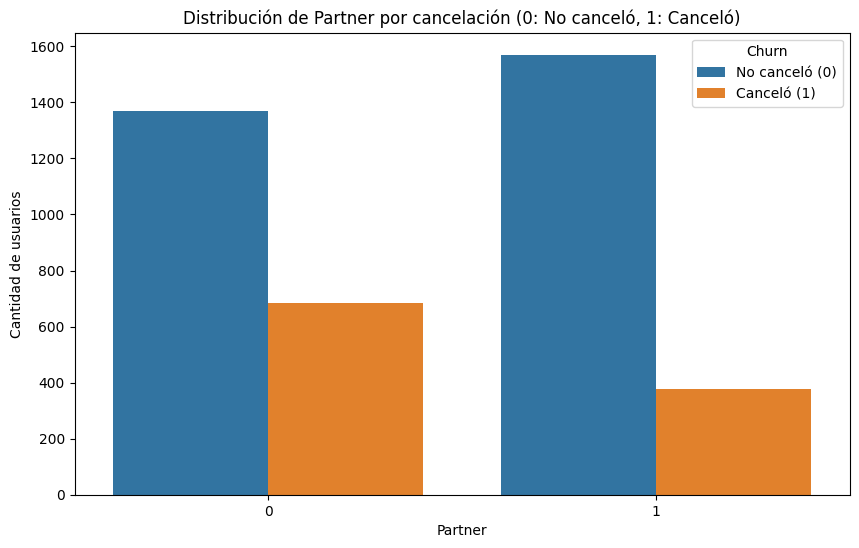

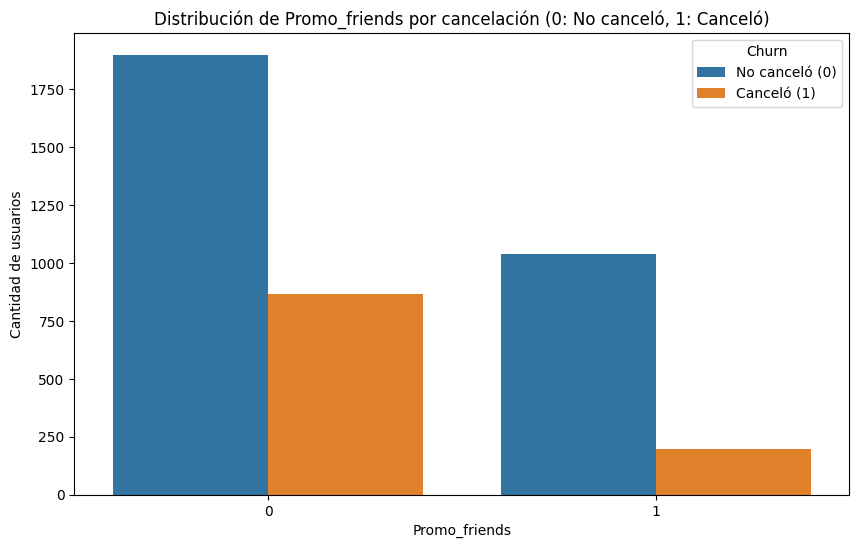

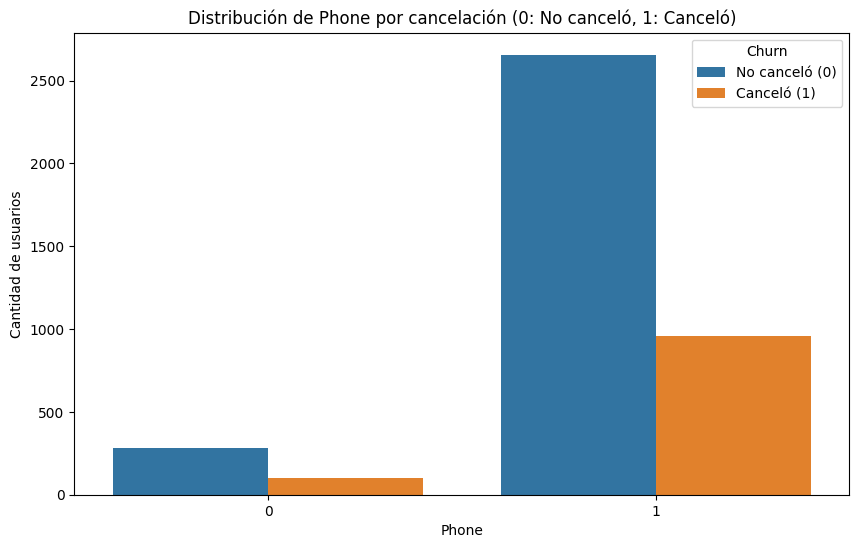

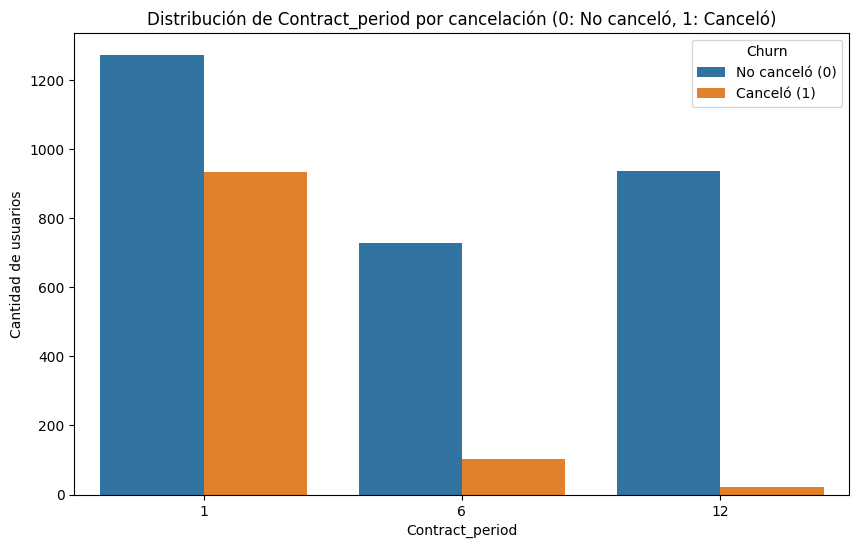

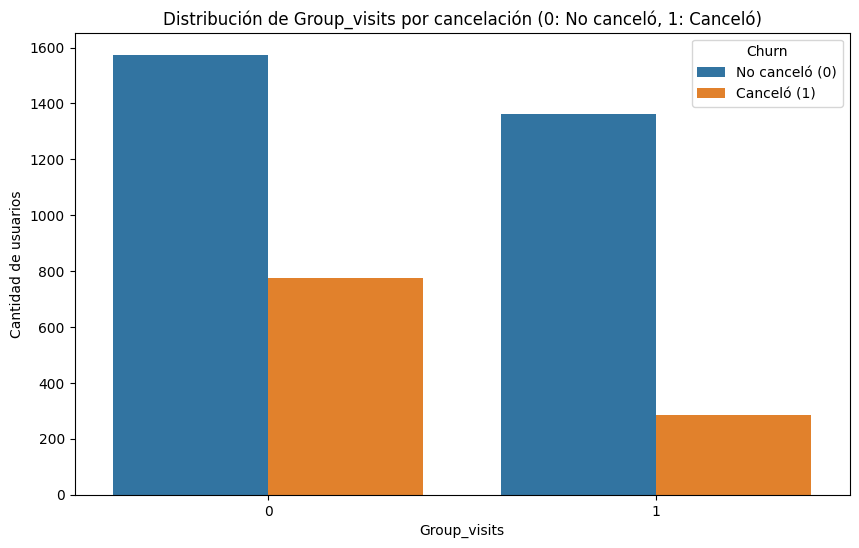

In [6]:
# Histograma de barras para características categóricas
categorical_features = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period', 'Group_visits']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=feature, hue='Churn')
    plt.title(f'Distribución de {feature} por cancelación (0: No canceló, 1: Canceló)')
    plt.xlabel(feature)
    plt.ylabel('Cantidad de usuarios')
    plt.legend(title='Churn', loc='upper right', labels=['No canceló (0)', 'Canceló (1)'])
    plt.show()

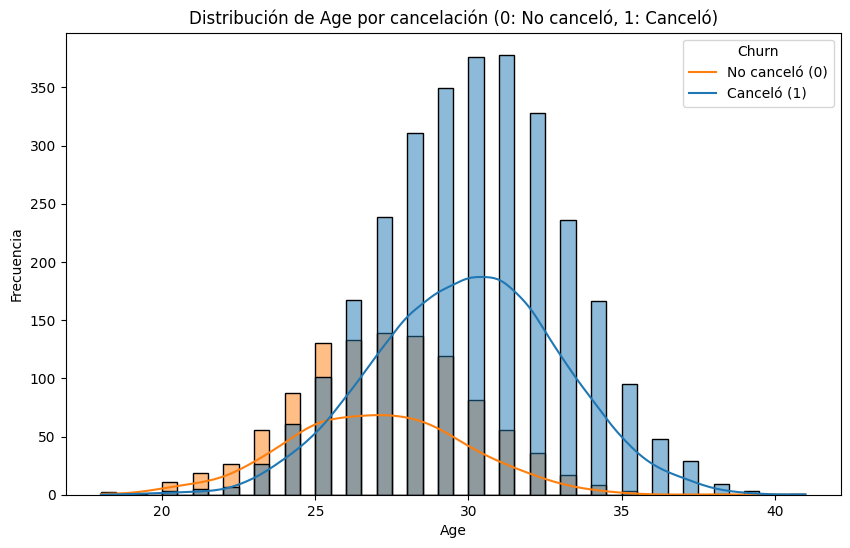

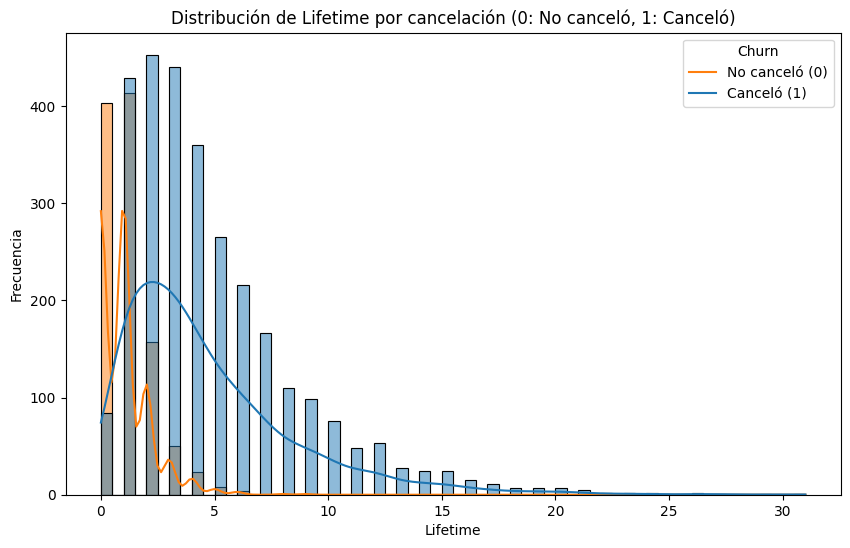

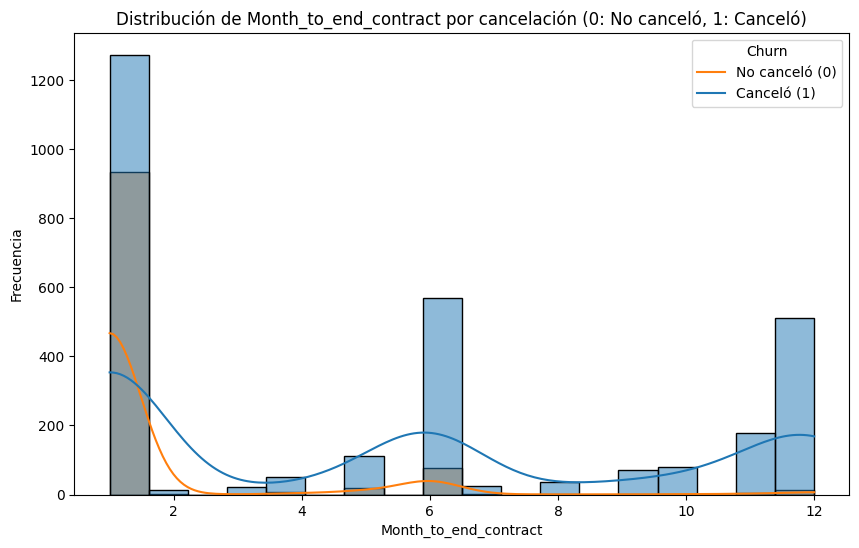

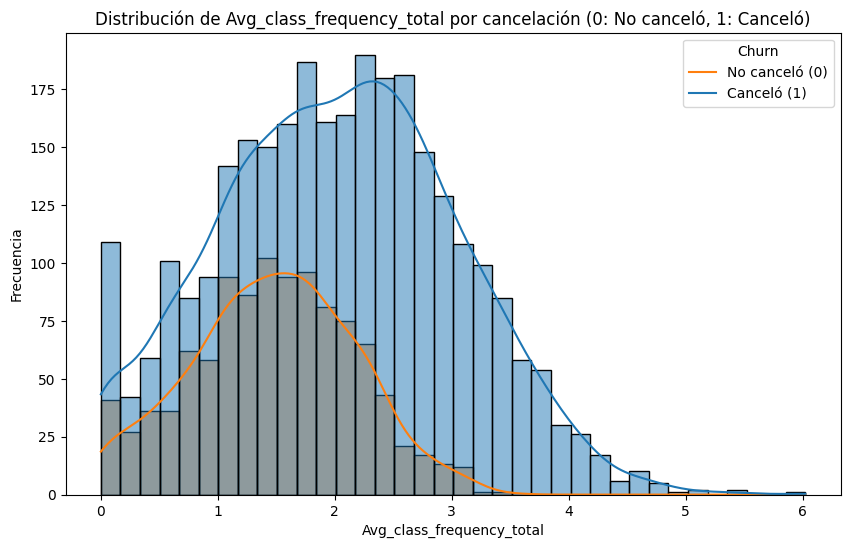

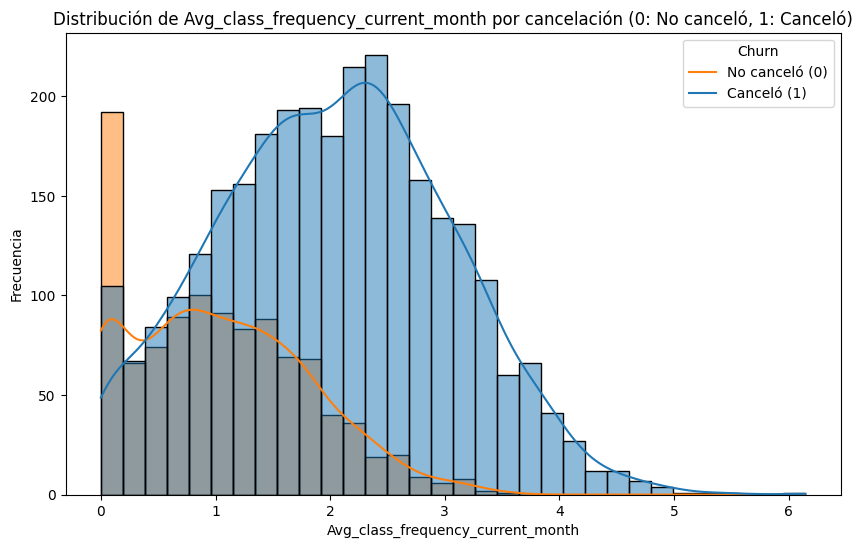

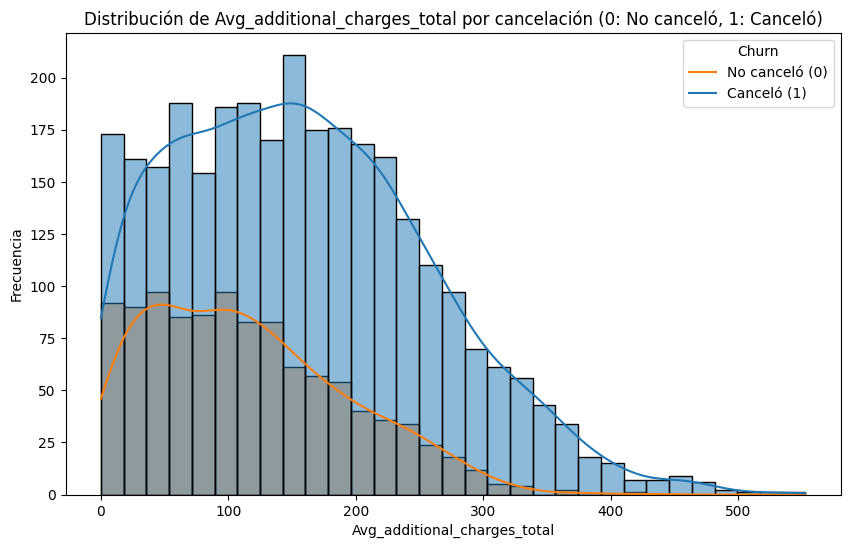

In [7]:
# Distribuciones para características numéricas
numeric_features = ['Age', 'Lifetime', 'Month_to_end_contract', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Avg_additional_charges_total']
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=feature, hue='Churn', kde=True)
    plt.title(f'Distribución de {feature} por cancelación (0: No canceló, 1: Canceló)')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.legend(title='Churn', loc='upper right', labels=['No canceló (0)', 'Canceló (1)'])
    plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
El análisis exploratorio de datos es exhaustivo y bien estructurado. Has verificado los valores ausentes, calculado estadísticas descriptivas y explorado la distribución de las características categóricas y numéricas. Las visualizaciones proporcionan una buena comprensión de los datos.
</div>

**Notas**:  las distribuciones de características numéricas nos proporcionan información sobre la forma, concentración y variabilidad de los datos, lo que nos ayuda a comprender mejor la composición y diversidad de nuestra base de clientes

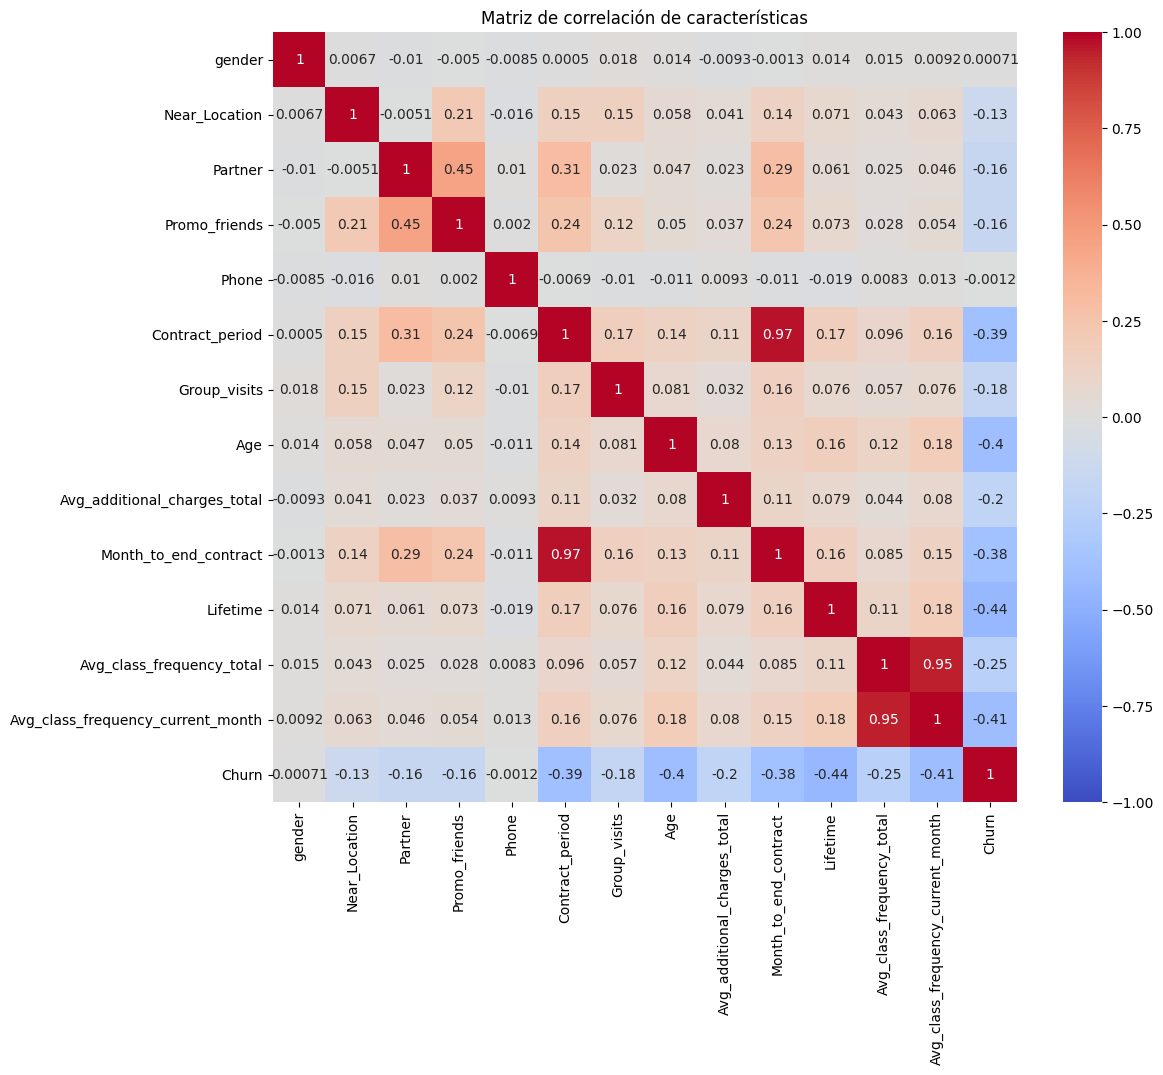

In [8]:
# Matriz de correlación
correlation_matrix = data.corr()

# Mostrar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación de características')
plt.show()

**Notas**: la matriz de correlación nos proporciona información valiosa sobre las relaciones entre las características de los clientes, lo que nos ayuda a comprender mejor el conjunto de datos y a identificar patrones y tendencias que pueden ser útiles para la toma de decisiones.

<b>Comentario del revisor</b> <a class=“tocSkip”></a>
La matriz de correlación está bien presentada y proporciona información valiosa sobre las relaciones entre las características. La visualización es clara y fácil de interpretar.
</div>

## Construir Modelo de predicción.

In [9]:
# Paso 1: Dividir los datos en conjuntos de entrenamiento y validación
X = data.drop(columns=['Churn'])
y = data['Churn']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Paso 2: Entrenar el modelo en el conjunto de entrenamiento

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Regresión Logística con datos escalados
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# Bosque Aleatorio
# Verificar los datos de entrada
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de y_train:", y_train.shape)

# Asegurarse de que no haya valores faltantes en los datos
print("Valores faltantes en X_train:", X_train.isnull().sum().sum())
print("Valores faltantes en y_train:", y_train.isnull().sum())

# Revisar los parámetros del modelo
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

Tamaño de X_train: (3200, 13)
Tamaño de y_train: (3200,)
Valores faltantes en X_train: 0
Valores faltantes en y_train: 0


RandomForestClassifier(random_state=42)

In [11]:
# Paso 3: Evaluar la exactitud, precisión y recall para ambos modelos
# Regresión Logística
logistic_predictions = logistic_model.predict(X_val)
logistic_accuracy = accuracy_score(y_val, logistic_predictions)
logistic_precision = precision_score(y_val, logistic_predictions, zero_division=1)
logistic_recall = recall_score(y_val, logistic_predictions)

# Bosque Aleatorio
rf_predictions = rf_model.predict(X_val)
rf_accuracy = accuracy_score(y_val, rf_predictions)
rf_precision = precision_score(y_val, rf_predictions)
rf_recall = recall_score(y_val, rf_predictions)

# Comparar los resultados de ambos modelos
print("Resultados de Regresión Logística:")
print(f"Exactitud: {logistic_accuracy:.2f}")
print(f"Precisión: {logistic_precision:.2f}")
print(f"Recall: {logistic_recall:.2f}")
print("\nResultados de Bosque Aleatorio:")
print(f"Exactitud: {rf_accuracy:.2f}")
print(f"Precisión: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")

Resultados de Regresión Logística:
Exactitud: 0.75
Precisión: 1.00
Recall: 0.00

Resultados de Bosque Aleatorio:
Exactitud: 0.91
Precisión: 0.85
Recall: 0.78


**Notas**: En comparación, el modelo de Bosque Aleatorio muestra un rendimiento sólido en todas las métricas, con una alta exactitud, precisión y recall. Esto sugiere que el modelo de Bosque Aleatorio es más efectivo para predecir la cancelación de usuarios en este conjunto de datos en particular.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
El enfoque para la construcción del modelo de predicción es sólido, pero podrías mejorar la explicación de los resultados y comparaciones entre los modelos. Es positivo que hayas evaluado tanto la regresión logística como el bosque aleatorio, pero sería útil incluir más detalles sobre la selección de hiperparámetros y la justificación de las elecciones de modelos.
</div>

## Crear clústeres de usuarios/as

In [12]:
# Paso 1: Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

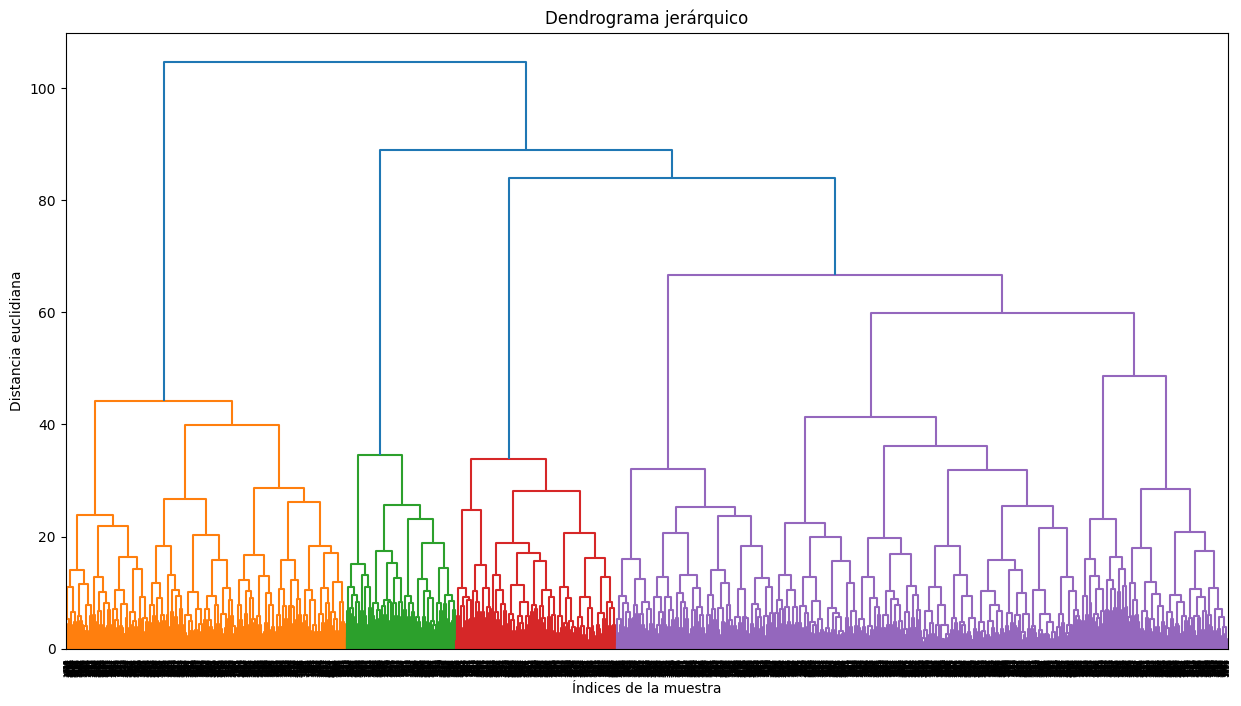

In [13]:
# Paso 2: Crear una matriz de distancias y trazar un dendrograma
linkage_matrix = linkage(X_scaled, method='ward')  # Crear la matriz de enlace
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix)
plt.title('Dendrograma jerárquico')
plt.xlabel('Índices de la muestra')
plt.ylabel('Distancia euclidiana')
plt.show()

In [14]:
# Paso 3: Entrenar el modelo de clustering con K-means
k = 5  # Número de clústeres
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [15]:
# Paso 4: Explorar los valores medios de las características para los clústeres
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=X.columns)
print("Valores medios de características para cada clúster:")
print(cluster_centers_df)


Valores medios de características para cada clúster:
     gender  Near_Location   Partner  Promo_friends         Phone  \
0  0.502370       0.949447  0.829384       0.998420  1.000000e+00   
1  0.554556       0.849269  0.263217       0.052868  1.000000e+00   
2  0.499422       0.937572  0.737572       0.478613  1.000000e+00   
3  0.485738       0.718011  0.299919       0.018745  1.000000e+00   
4  0.523316       0.862694  0.471503       0.305699 -1.110223e-16   

   Contract_period  Group_visits        Age  Avg_additional_charges_total  \
0         3.097946      0.448657  29.104265                    141.774331   
1         2.606299      0.436445  30.008999                    159.774265   
2        11.854335      0.546821  29.905202                    163.509804   
3         1.914425      0.276284  28.083945                    129.496414   
4         4.777202      0.427461  29.297927                    144.208179   

   Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
0   

/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


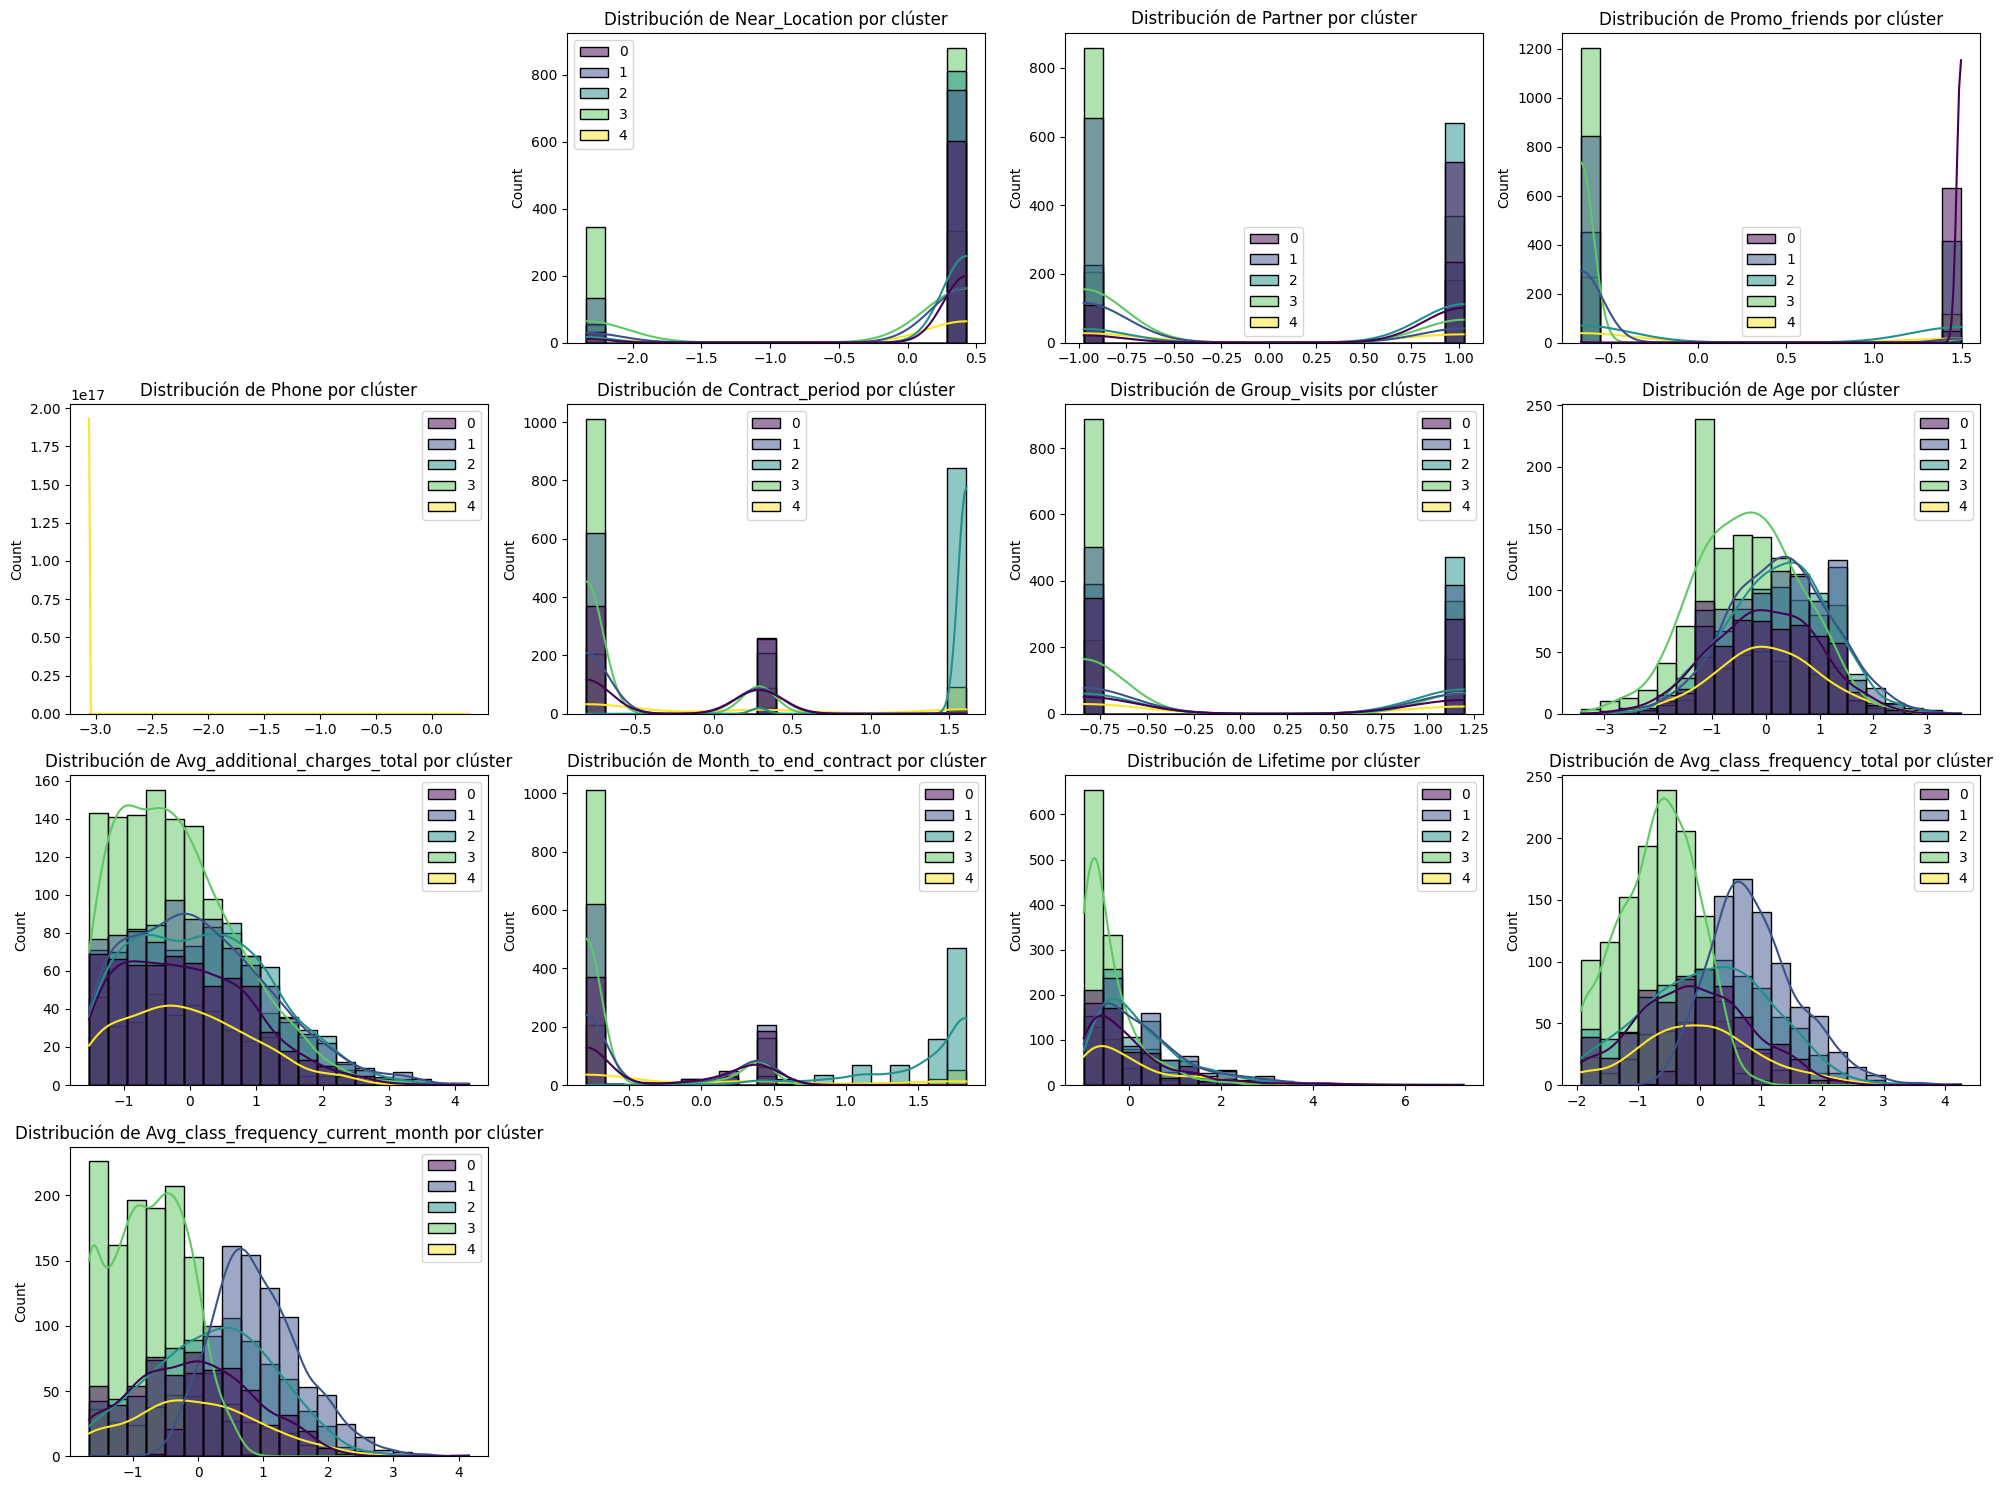

In [17]:
# Paso 5: Traza distribuciones de características para los clústeres

# Calcular la varianza de cada característica
variances = np.var(X_scaled, axis=0)

# Encontrar las características con varianza cero
zero_variance_features = X.columns[variances == 0]

plt.figure(figsize=(20, 15))
for i, feature in enumerate(X.columns):
    if feature != 'gender' and feature not in zero_variance_features:
        plt.subplot(4, 4, i + 1)  # Cambia 4, 4 a tus necesidades para ajustar la disposición
        data = X_scaled[:, i]
        sns.histplot(x=data, hue=clusters, kde=True, bins=20, palette='viridis')
        plt.title(f'Distribución de {feature} por clúster')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
La creación de clústeres de usuarios está bien manejada. Has estandarizado los datos, creado un dendrograma para visualizar la jerarquía y utilizado K-means para segmentar los usuarios. Las visualizaciones de las distribuciones de características para los clústeres son informativas.
</div>

## Conclusiones y recomendaciones.

Basándonos en los análisis realizados, podemos llegar a las siguientes conclusiones y recomendaciones:

- Personalización de la Experiencia: Una vez que hayas identificado los segmentos de clientes, personaliza la experiencia para satisfacer las necesidades específicas de cada grupo. Por ejemplo, ofrece promociones y servicios que sean relevantes para cada segmento.

- Fomento de la Lealtad: Implementa programas de fidelización para incentivar a los clientes a permanecer en tu negocio. Ofrece recompensas, descuentos exclusivos y beneficios adicionales para los clientes leales.

- Monitoreo Continuo y Retroalimentación: Realiza un seguimiento continuo del comportamiento de los clientes y recopila comentarios para identificar áreas de mejora. Utiliza herramientas como encuestas de satisfacción, análisis de redes sociales y métricas de retención para entender las necesidades y expectativas de los clientes.

Estos principios pueden implementarse a través de pasos de marketing específicos, como el diseño de campañas promocionales dirigidas a segmentos específicos, la creación de programas de recompensas personalizados y el establecimiento de canales de comunicación efectivos para recopilar retroalimentación de los clientes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Las conclusiones y recomendaciones están bien fundamentadas en los análisis realizados. Has identificado acciones claras y específicas que se pueden tomar para mejorar la retención de clientes basándote en los resultados del análisis.
</div>